In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
ct=pd.read_csv("new_file_u8.csv")
ct.head()

,Unnamed: 0,Unnamed: 0.1,Title,Price,Location,Brand,Model,Year,Varient,Fuel,KM_Driven,No_of_Onwers
0,0,0.0,-,-,-,-,-,-,-,-,-,-
1,1,1.0,Honda City 2018 Petrol Doctor driven,"₹ 10,90,000","Vikas Colony, Patiala, Punjab",Honda,City,2018,i-VTEC CVT VX,Petrol,"12,316 km",1st
2,2,2.0,"Honda City ZX GXi, 2008, Diesel","₹ 2,85,000","Shinivagalu Tank Bed Layout, Bengaluru, Karnataka",Honda,City ZX,2008,GXi,Diesel,"70,508 km",2nd
3,3,3.0,-,-,-,-,-,-,-,-,-,-
4,4,4.0,-,-,-,-,-,-,-,-,-,-


In [3]:
ct.shape

(3396, 12)

In [4]:
ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3396 entries, 0 to 3395
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    3396 non-null   int64  
 1   Unnamed: 0.1  1380 non-null   float64
 2   Title         3396 non-null   object 
 3   Price         3396 non-null   object 
 4   Location      3396 non-null   object 
 5   Brand         3394 non-null   object 
 6   Model         3394 non-null   object 
 7   Year          3394 non-null   object 
 8   Varient       3394 non-null   object 
 9   Fuel          3394 non-null   object 
 10  KM_Driven     3394 non-null   object 
 11  No_of_Onwers  3394 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 318.5+ KB


In [5]:
ct.dtypes

Unnamed: 0        int64
Unnamed: 0.1    float64
Title            object
Price            object
Location         object
Brand            object
Model            object
Year             object
Varient          object
Fuel             object
KM_Driven        object
No_of_Onwers     object
dtype: object

In [6]:
ct.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [7]:
ct.columns

Index(['Title', 'Price', 'Location', 'Brand', 'Model', 'Year', 'Varient',
       'Fuel', 'KM_Driven', 'No_of_Onwers'],
      dtype='object')

In [8]:
ct.index

RangeIndex(start=0, stop=3396, step=1)

In [9]:
ct.replace('-',np.nan)

,Title,Price,Location,Brand,Model,Year,Varient,Fuel,KM_Driven,No_of_Onwers
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Honda City 2018 Petrol Doctor driven,"₹ 10,90,000","Vikas Colony, Patiala, Punjab",Honda,City,2018,i-VTEC CVT VX,Petrol,"12,316 km",1st
2,"Honda City ZX GXi, 2008, Diesel","₹ 2,85,000","Shinivagalu Tank Bed Layout, Bengaluru, Karnataka",Honda,City ZX,2008,GXi,Diesel,"70,508 km",2nd
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3391,BMW 5 Series 2010,"₹ 10,15,000","AB Bypass Road, Indore, Madhya Pradesh",BMW,5 Series,2010,525d Luxury Line,Diesel,"98,250 km",2nd
3392,BMW X1 2018 Diesel Well Maintained,"₹ 28,50,000","Chauhan Town, Bhilai, Chhattisgarh",BMW,X1,2018,sDrive20d Expedition,Diesel,"22,000 km",1st
3393,"BMW X1 Others, 2018, Diesel","₹ 25,50,000","Adajan, Surat, Gujarat",BMW,X1,2018,Others,Diesel,"52,000 km",1st
3394,"BMW 5 Series 520d Luxury Line, 2018, Diesel","₹ 40,75,000","DLF City Phase 1, Gurgaon, Haryana",BMW,5 Series,2018,520d Luxury Line,Diesel,"42,000 km",1st


In [10]:
oo=ct.copy()

In [11]:
oo['Price']=oo['Price'].str.replace("[\₹\,]","",regex=True)

In [12]:
oo

,Title,Price,Location,Brand,Model,Year,Varient,Fuel,KM_Driven,No_of_Onwers
0,-,-,-,-,-,-,-,-,-,-
1,Honda City 2018 Petrol Doctor driven,1090000,"Vikas Colony, Patiala, Punjab",Honda,City,2018,i-VTEC CVT VX,Petrol,"12,316 km",1st
2,"Honda City ZX GXi, 2008, Diesel",285000,"Shinivagalu Tank Bed Layout, Bengaluru, Karnataka",Honda,City ZX,2008,GXi,Diesel,"70,508 km",2nd
3,-,-,-,-,-,-,-,-,-,-
4,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...
3391,BMW 5 Series 2010,1015000,"AB Bypass Road, Indore, Madhya Pradesh",BMW,5 Series,2010,525d Luxury Line,Diesel,"98,250 km",2nd
3392,BMW X1 2018 Diesel Well Maintained,2850000,"Chauhan Town, Bhilai, Chhattisgarh",BMW,X1,2018,sDrive20d Expedition,Diesel,"22,000 km",1st
3393,"BMW X1 Others, 2018, Diesel",2550000,"Adajan, Surat, Gujarat",BMW,X1,2018,Others,Diesel,"52,000 km",1st
3394,"BMW 5 Series 520d Luxury Line, 2018, Diesel",4075000,"DLF City Phase 1, Gurgaon, Haryana",BMW,5 Series,2018,520d Luxury Line,Diesel,"42,000 km",1st


In [13]:
oo.replace('-',np.nan,inplace=True)

In [14]:
oo.head()

,Title,Price,Location,Brand,Model,Year,Varient,Fuel,KM_Driven,No_of_Onwers
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Honda City 2018 Petrol Doctor driven,1090000,"Vikas Colony, Patiala, Punjab",Honda,City,2018,i-VTEC CVT VX,Petrol,"12,316 km",1st
2,"Honda City ZX GXi, 2008, Diesel",285000,"Shinivagalu Tank Bed Layout, Bengaluru, Karnataka",Honda,City ZX,2008,GXi,Diesel,"70,508 km",2nd
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
oo['Price'] = pd.to_numeric(
    oo['Price'], 
    errors='coerce'
).fillna(0).astype('int')

In [16]:
oo

,Title,Price,Location,Brand,Model,Year,Varient,Fuel,KM_Driven,No_of_Onwers
0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Honda City 2018 Petrol Doctor driven,1090000,"Vikas Colony, Patiala, Punjab",Honda,City,2018,i-VTEC CVT VX,Petrol,"12,316 km",1st
2,"Honda City ZX GXi, 2008, Diesel",285000,"Shinivagalu Tank Bed Layout, Bengaluru, Karnataka",Honda,City ZX,2008,GXi,Diesel,"70,508 km",2nd
3,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3391,BMW 5 Series 2010,1015000,"AB Bypass Road, Indore, Madhya Pradesh",BMW,5 Series,2010,525d Luxury Line,Diesel,"98,250 km",2nd
3392,BMW X1 2018 Diesel Well Maintained,2850000,"Chauhan Town, Bhilai, Chhattisgarh",BMW,X1,2018,sDrive20d Expedition,Diesel,"22,000 km",1st
3393,"BMW X1 Others, 2018, Diesel",2550000,"Adajan, Surat, Gujarat",BMW,X1,2018,Others,Diesel,"52,000 km",1st
3394,"BMW 5 Series 520d Luxury Line, 2018, Diesel",4075000,"DLF City Phase 1, Gurgaon, Haryana",BMW,5 Series,2018,520d Luxury Line,Diesel,"42,000 km",1st


In [17]:
cd=oo.copy()

In [18]:
cd.head()

,Title,Price,Location,Brand,Model,Year,Varient,Fuel,KM_Driven,No_of_Onwers
0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Honda City 2018 Petrol Doctor driven,1090000,"Vikas Colony, Patiala, Punjab",Honda,City,2018,i-VTEC CVT VX,Petrol,"12,316 km",1st
2,"Honda City ZX GXi, 2008, Diesel",285000,"Shinivagalu Tank Bed Layout, Bengaluru, Karnataka",Honda,City ZX,2008,GXi,Diesel,"70,508 km",2nd
3,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
cd.dtypes

Title           object
Price            int32
Location        object
Brand           object
Model           object
Year            object
Varient         object
Fuel            object
KM_Driven       object
No_of_Onwers    object
dtype: object

In [20]:
cd.isnull().sum()

Title           526
Price             0
Location        526
Brand           531
Model           536
Year            548
Varient         541
Fuel            566
KM_Driven       644
No_of_Onwers    776
dtype: int64

In [21]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
cd['Title']=imp.fit_transform(cd['Title'].values.reshape(-1,1))
cd['Location']=imp.fit_transform(cd['Location'].values.reshape(-1,1))
cd['Brand']=imp.fit_transform(cd['Brand'].values.reshape(-1,1))
cd['Model']=imp.fit_transform(cd['Model'].values.reshape(-1,1))
cd['Year']=imp.fit_transform(cd['Year'].values.reshape(-1,1))
cd['Fuel']=imp.fit_transform(cd['Fuel'].values.reshape(-1,1))
cd['Varient']=imp.fit_transform(cd['Varient'].values.reshape(-1,1))
cd['KM_Driven']=imp.fit_transform(cd['KM_Driven'].values.reshape(-1,1))
cd['No_of_Onwers']=imp.fit_transform(cd['No_of_Onwers'].values.reshape(-1,1))

<AxesSubplot:>

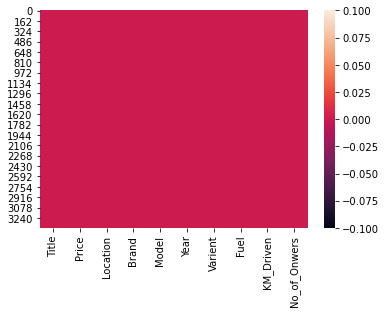

In [22]:
sns.heatmap(cd.isnull())

In [23]:
cd['Brand'].value_counts()

Maruti Suzuki                       1184
Hyundai                              311
BMW                                  306
Toyota                               235
Mercedes-Benz                        235
                                    ... 
Wheels & Tyres                         1
Vxi 1.1                                1
Hero Honda                             1
2004-2011 2.5 G4 Diesel 8-seater       1
RXT                                    1
Name: Brand, Length: 85, dtype: int64

In [24]:
cd['Year'].value_counts()

2012                         804
2014                         224
2015                         219
2016                         215
2013                         214
                            ... 
2016.0                         1
sDrive20d(H)                   1
2008-2012 LX (TDI) BS III      1
2010.0                         1
2012-2015 B180                 1
Name: Year, Length: 170, dtype: int64

In [25]:
cd[cd.Brand == 'BMW']

,Title,Price,Location,Brand,Model,Year,Varient,Fuel,KM_Driven,No_of_Onwers
1763,BMW 5 Series 2009 Diesel Well Maintained,850000,"Shapur Nagar, Hyderabad, Telangana",BMW,5 Series,2009,520d,Diesel,"67,000 km",1st
1785,"BMW 3 Series 320i Luxury Line, 2011, Petrol",750000,"Shahdara, Delhi, Delhi",BMW,3 Series,2011,320i Luxury Line,Petrol,1st,1st
1877,"BMW 5 Series 520d M Sport, 2016, Diesel",3100000,"Kirti Nagar, Delhi, Delhi",BMW,5 Series,2016,520d M Sport,Diesel,"55,000 km",2nd
1901,"BMW 5 Series 530d M Sport, 2018, Diesel",6000000,"Ushma Nagar, Mumbai, Maharashtra",BMW,5 Series,2018,530d M Sport,Diesel,"7,000 km",1st
1915,"BMW 7 Series 730Ld Sedan, 2015, Diesel",3350000,"South Extension, Delhi, Delhi",BMW,7 Series,2015,730Ld Sedan,Diesel,"68,000 km",2nd
...,...,...,...,...,...,...,...,...,...,...
3391,BMW 5 Series 2010,1015000,"AB Bypass Road, Indore, Madhya Pradesh",BMW,5 Series,2010,525d Luxury Line,Diesel,"98,250 km",2nd
3392,BMW X1 2018 Diesel Well Maintained,2850000,"Chauhan Town, Bhilai, Chhattisgarh",BMW,X1,2018,sDrive20d Expedition,Diesel,"22,000 km",1st
3393,"BMW X1 Others, 2018, Diesel",2550000,"Adajan, Surat, Gujarat",BMW,X1,2018,Others,Diesel,"52,000 km",1st
3394,"BMW 5 Series 520d Luxury Line, 2018, Diesel",4075000,"DLF City Phase 1, Gurgaon, Haryana",BMW,5 Series,2018,520d Luxury Line,Diesel,"42,000 km",1st


In [26]:
cd.groupby('Year').get_group('2018')

,Title,Price,Location,Brand,Model,Year,Varient,Fuel,KM_Driven,No_of_Onwers
1,Honda City 2018 Petrol Doctor driven,1090000,"Vikas Colony, Patiala, Punjab",Honda,City,2018,i-VTEC CVT VX,Petrol,"12,316 km",1st
78,"Honda Amaze 1.2 SMT I VTEC, 2018, Petrol",525000,"Cyber City, Gurgaon, Haryana",Honda,Amaze,2018,1.2 SMT I VTEC,Petrol,"19,000 km",1st
80,"Honda City i-VTEC SV, 2018, Petrol",844900,"DLF City Phase 5, Gurgaon, Haryana",Honda,City,2018,i-VTEC SV,Petrol,"18,154 km",1st
81,"Honda City i-VTEC V, 2018, Petrol",846300,"Rohini Avantika, Delhi, Delhi",Honda,City,2018,i-VTEC V,Petrol,"26,195 km",1st
105,"Honda City ZX CVT, 2018, Diesel",700000,"Palarivattom, Kochi, Kerala",Honda,City ZX,2018,CVT,Diesel,"52,000 km",1st
...,...,...,...,...,...,...,...,...,...,...
3380,"BMW 5 Series 520d Luxury Line, 2018, Diesel",4195000,"South Extension, Delhi, Delhi",BMW,5 Series,2018,520d Luxury Line,Diesel,"36,000 km",1st
3382,"BMW 5 Series 520d Luxury Line, 2018, Diesel",3999999,"MG Road, Gurgaon, Haryana",BMW,5 Series,2018,520d Luxury Line,Diesel,"50,000 km",1st
3392,BMW X1 2018 Diesel Well Maintained,2850000,"Chauhan Town, Bhilai, Chhattisgarh",BMW,X1,2018,sDrive20d Expedition,Diesel,"22,000 km",1st
3393,"BMW X1 Others, 2018, Diesel",2550000,"Adajan, Surat, Gujarat",BMW,X1,2018,Others,Diesel,"52,000 km",1st


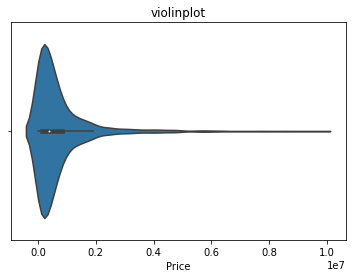

In [27]:
sns.violinplot(x='Price',data=cd)
plt.title('violinplot')
plt.show()

<AxesSubplot:>

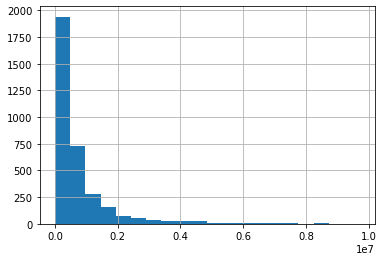

In [28]:
cd.Price.hist(bins=20)

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [30]:
cd.head()

,Title,Price,Location,Brand,Model,Year,Varient,Fuel,KM_Driven,No_of_Onwers
0,"BMW 5 Series 520d Luxury Line, 2018, Diesel",0,"Ashok Vihar, Delhi, Delhi",Maruti Suzuki,City,2012,Others,Diesel,"70,000 km",1st
1,Honda City 2018 Petrol Doctor driven,1090000,"Vikas Colony, Patiala, Punjab",Honda,City,2018,i-VTEC CVT VX,Petrol,"12,316 km",1st
2,"Honda City ZX GXi, 2008, Diesel",285000,"Shinivagalu Tank Bed Layout, Bengaluru, Karnataka",Honda,City ZX,2008,GXi,Diesel,"70,508 km",2nd
3,"BMW 5 Series 520d Luxury Line, 2018, Diesel",0,"Ashok Vihar, Delhi, Delhi",Maruti Suzuki,City,2012,Others,Diesel,"70,000 km",1st
4,"BMW 5 Series 520d Luxury Line, 2018, Diesel",0,"Ashok Vihar, Delhi, Delhi",Maruti Suzuki,City,2012,Others,Diesel,"70,000 km",1st


In [31]:
cd.Fuel=le.fit_transform(cd.Fuel)

In [32]:
cd.Model=le.fit_transform(cd.Model)

In [33]:
cd.Brand=le.fit_transform(cd.Brand)

In [34]:
cd.Year=le.fit_transform(cd.Year)

In [35]:
cd.Varient=le.fit_transform(cd.Varient)

In [36]:
cd.KM_Driven=le.fit_transform(cd.KM_Driven)

In [37]:
cd.No_of_Onwers=le.fit_transform(cd.No_of_Onwers)

In [38]:
cd.drop(['Title','Location'],axis=1,inplace=True)

In [39]:
cd.head()

,Price,Brand,Model,Year,Varient,Fuel,KM_Driven,No_of_Onwers
0,0,66,61,65,768,88,554,9
1,1090000,55,61,84,973,133,70,9
2,285000,55,62,49,697,88,560,16
3,0,66,61,65,768,88,554,9
4,0,66,61,65,768,88,554,9


In [40]:
cd['Price'].dtypes

dtype('int32')

In [41]:
cd['Price'].replace('0',np.nan,inplace=True)

In [42]:
cd['Price']=cd['Price'].fillna(cd['Price'].mean()) 

In [43]:
cd.head()

,Price,Brand,Model,Year,Varient,Fuel,KM_Driven,No_of_Onwers
0,0,66,61,65,768,88,554,9
1,1090000,55,61,84,973,133,70,9
2,285000,55,62,49,697,88,560,16
3,0,66,61,65,768,88,554,9
4,0,66,61,65,768,88,554,9


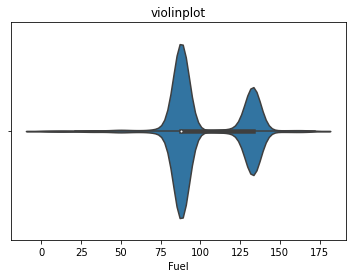

In [44]:
sns.violinplot(x='Fuel',data=cd)
plt.title('violinplot')
plt.show()

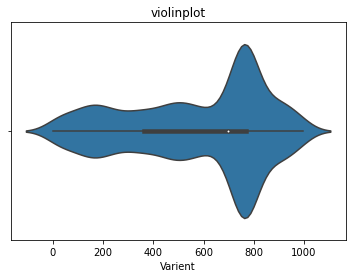

In [45]:
sns.violinplot(x='Varient',data=cd)
plt.title('violinplot')
plt.show()

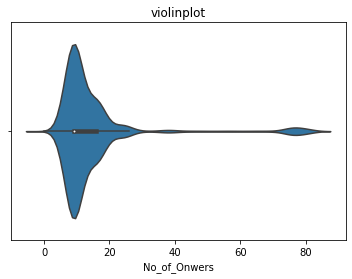

In [46]:
sns.violinplot(x='No_of_Onwers',data=cd)
plt.title('violinplot')
plt.show()

<AxesSubplot:xlabel='Varient', ylabel='Price'>

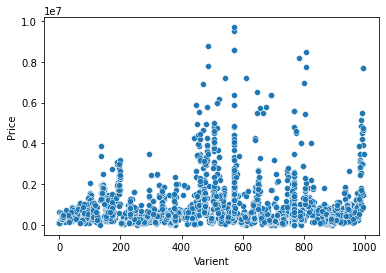

In [47]:
sns.scatterplot(x='Varient',y='Price',data=cd)

<AxesSubplot:xlabel='KM_Driven', ylabel='Price'>

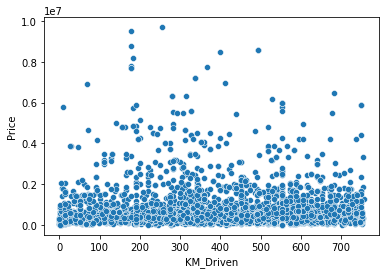

In [48]:
sns.scatterplot(x='KM_Driven',y='Price',data=cd)

<AxesSubplot:xlabel='Year', ylabel='Price'>

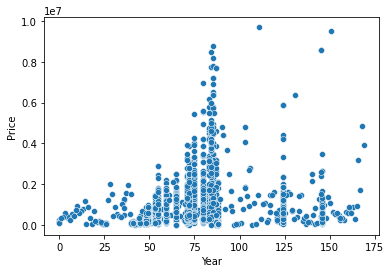

In [49]:
sns.scatterplot(x='Year',y='Price',data=cd)

<AxesSubplot:xlabel='Brand', ylabel='Price'>

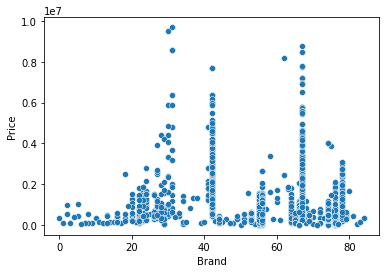

In [50]:
sns.scatterplot(x='Brand',y='Price',data=cd)

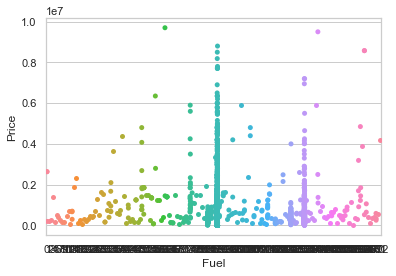

In [51]:
sns.set(style='whitegrid')
sns.stripplot(x='Fuel',y='Price',data=cd)
plt.show()

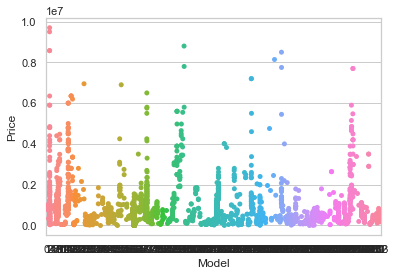

In [52]:
sns.set(style='whitegrid')
sns.stripplot(x='Model',y='Price',data=cd)
plt.show()

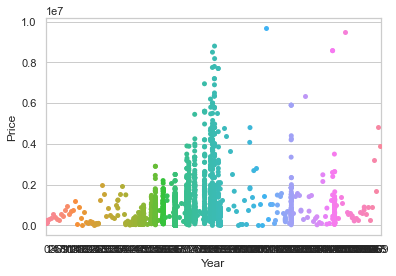

In [53]:
sns.set(style='whitegrid')
sns.stripplot(x='Year',y='Price',data=cd)
plt.show()

<AxesSubplot:>

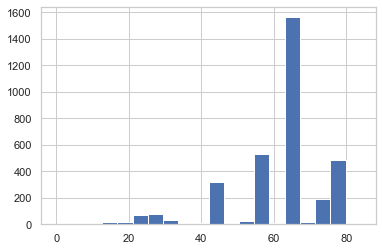

In [54]:
cd.Brand.hist(bins=20)

<AxesSubplot:>

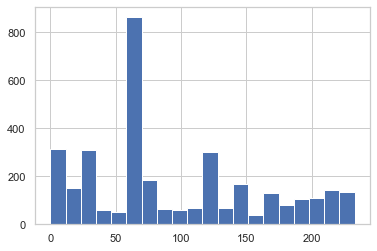

In [55]:
cd.Model.hist(bins=20)

<AxesSubplot:>

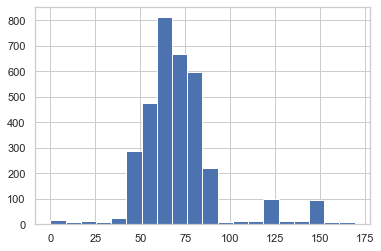

In [56]:
cd.Year.hist(bins=20)

<AxesSubplot:>

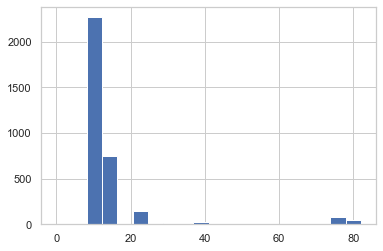

In [57]:
cd.No_of_Onwers.hist(bins=20)

<AxesSubplot:>

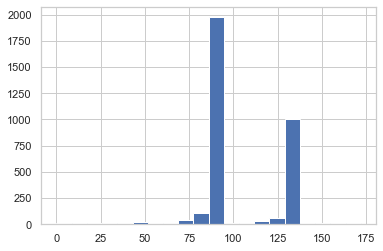

In [58]:
cd.Fuel.hist(bins=20)

<AxesSubplot:xlabel='Price', ylabel='Density'>

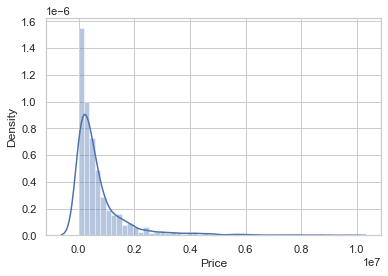

In [59]:
sns.distplot(cd['Price'],kde=True)

<AxesSubplot:xlabel='Brand', ylabel='Density'>

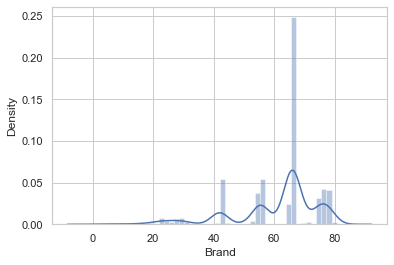

In [60]:
sns.distplot(cd['Brand'],kde=True)

<AxesSubplot:xlabel='Year', ylabel='Density'>

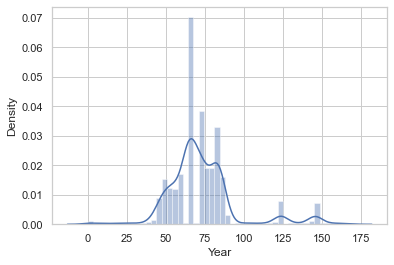

In [61]:
sns.distplot(cd['Year'],kde=True)

<AxesSubplot:xlabel='No_of_Onwers', ylabel='Density'>

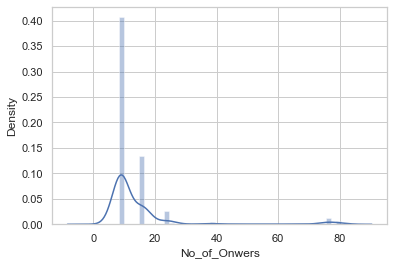

In [62]:
sns.distplot(cd['No_of_Onwers'],kde=True)

<AxesSubplot:xlabel='Fuel', ylabel='Density'>

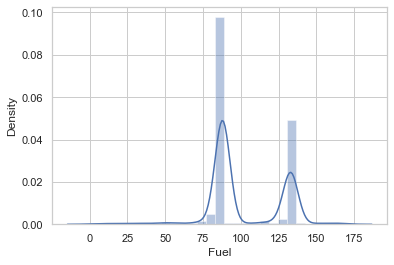

In [63]:
sns.distplot(cd['Fuel'],kde=True)

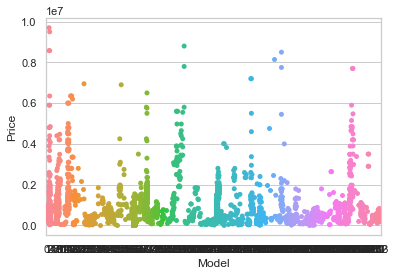

In [64]:
ax=sns.swarmplot(x="Model", y="Price", data=cd)

<AxesSubplot:xlabel='No_of_Onwers', ylabel='Price'>

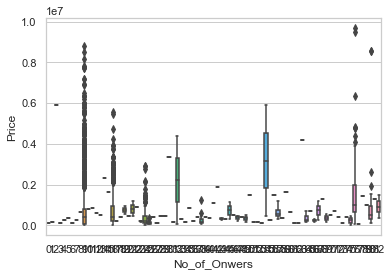

In [65]:
sns.boxplot(x='No_of_Onwers',y='Price',data=cd)

<AxesSubplot:xlabel='Brand', ylabel='Price'>

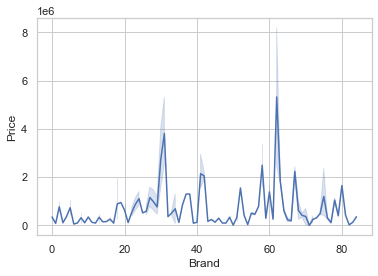

In [66]:
sns.lineplot(x="Brand", y="Price", data=cd)

<AxesSubplot:xlabel='Year', ylabel='Price'>

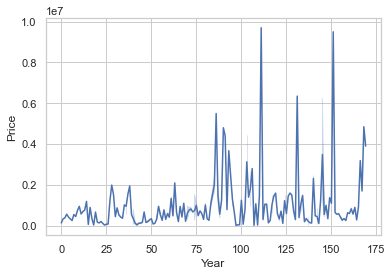

In [67]:
sns.lineplot(x="Year", y="Price", data=cd)

<AxesSubplot:xlabel='Fuel', ylabel='Price'>

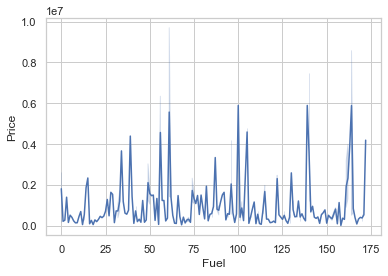

In [68]:
sns.lineplot(x="Fuel", y="Price", data=cd)

<AxesSubplot:xlabel='KM_Driven', ylabel='Price'>

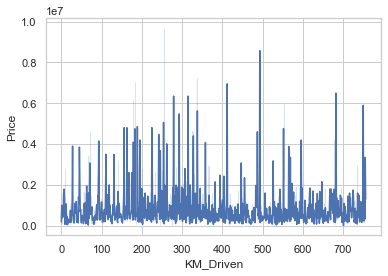

In [69]:
sns.lineplot(x="KM_Driven", y="Price", data=cd)

In [70]:
cd.describe()

,Price,Brand,Model,Year,Varient,Fuel,KM_Driven,No_of_Onwers
count,3.396000e+03,3396.000000,3396.000000,3396.000000,3396.000000,3396.000000,3396.000000,3396.000000
mean,7.251012e+05,61.073910,94.435807,72.744994,578.108363,101.437279,432.297409,14.690813
std,1.055214e+06,14.039377,66.771730,22.394713,273.132483,24.837069,198.614939,14.157367
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.400000e+05,56.000000,51.000000,65.000000,362.000000,88.000000,291.750000,9.000000
50%,3.950000e+05,66.000000,69.000000,71.000000,697.000000,88.000000,504.500000,9.000000
75%,8.400000e+05,67.000000,143.000000,83.000000,768.000000,133.000000,554.000000,16.000000
max,9.699000e+06,84.000000,233.000000,169.000000,997.000000,172.000000,756.000000,82.000000


In [71]:
cd.corr()

,Price,Brand,Model,Year,Varient,Fuel,KM_Driven,No_of_Onwers
Price,1.000000,-0.228776,-0.013043,0.259459,-0.076207,-0.122660,-0.126560,0.095097
Brand,-0.228776,1.000000,0.324579,-0.276483,-0.127092,0.003454,-0.156176,-0.569477
Model,-0.013043,0.324579,1.000000,-0.085921,-0.044623,0.034235,-0.170132,-0.274807
Year,0.259459,-0.276483,-0.085921,1.000000,-0.018438,-0.106627,0.036085,0.207947
Varient,-0.076207,-0.127092,-0.044623,-0.018438,1.000000,0.013426,0.103688,0.052009
Fuel,-0.122660,0.003454,0.034235,-0.106627,0.013426,1.000000,-0.174758,-0.006353
KM_Driven,-0.126560,-0.156176,-0.170132,0.036085,0.103688,-0.174758,1.000000,0.042022
No_of_Onwers,0.095097,-0.569477,-0.274807,0.207947,0.052009,-0.006353,0.042022,1.000000


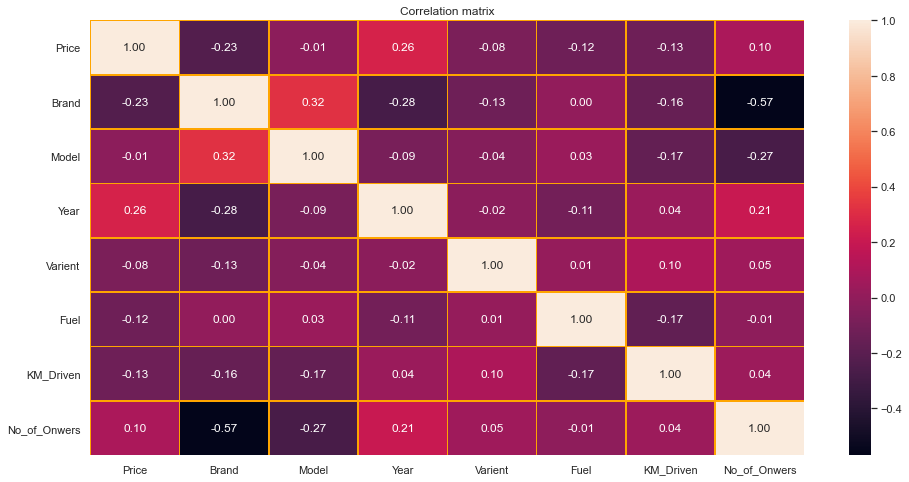

In [72]:
corr=cd.corr()                                               # multivariate analysis
plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True,linewidths=0.5,linecolor='orange',fmt='.2f',)
plt.title('Correlation matrix')
plt.show()

<AxesSubplot:>

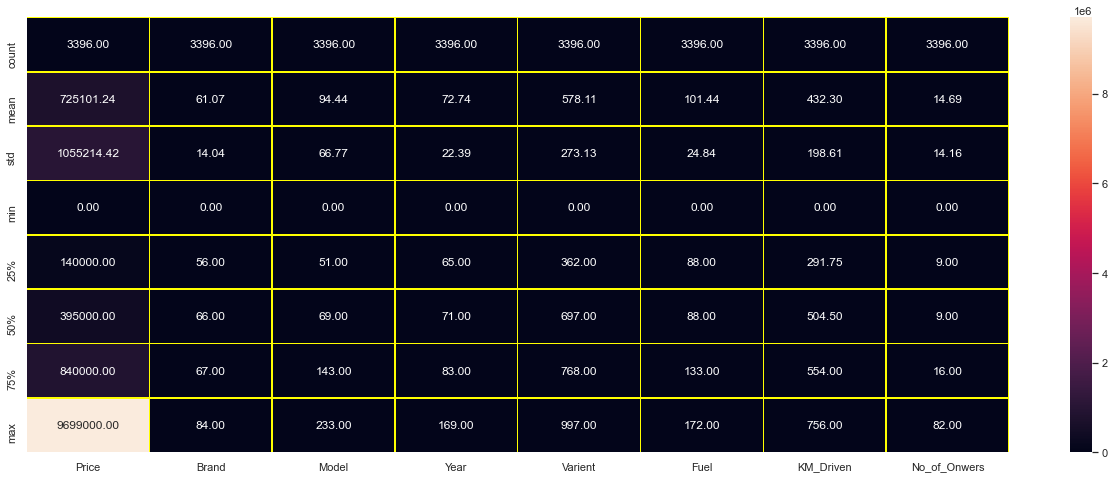

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,8))
sns.heatmap(cd.describe(),annot=True,linewidths=0.5,linecolor='yellow',fmt='0.2f')

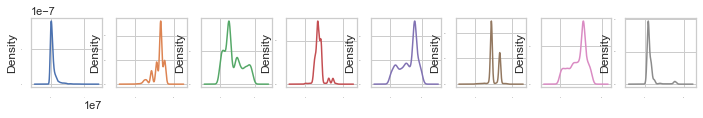

In [74]:
cd.plot(kind='density',subplots=True,layout=(8,12),fontsize=1,figsize=(18,12),sharex=False,legend=False)
plt.show()

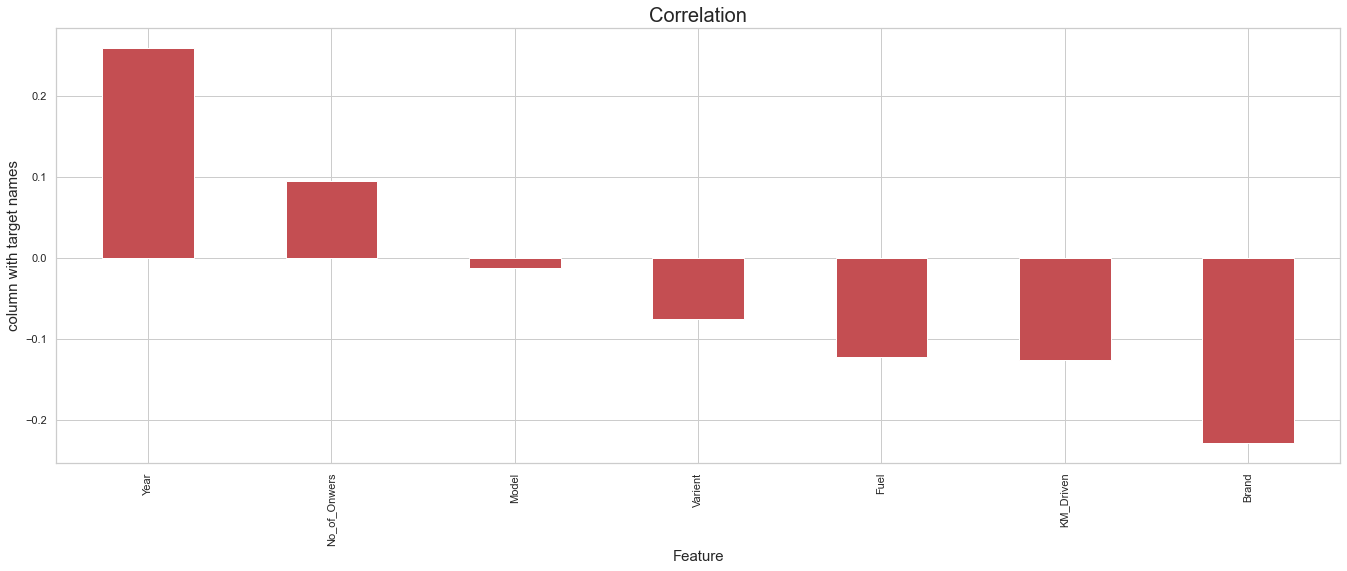

In [75]:
plt.figure(figsize=(23,8))
cd.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('column with target names',fontsize=15)
plt.title("Correlation",fontsize=20)
plt.show()

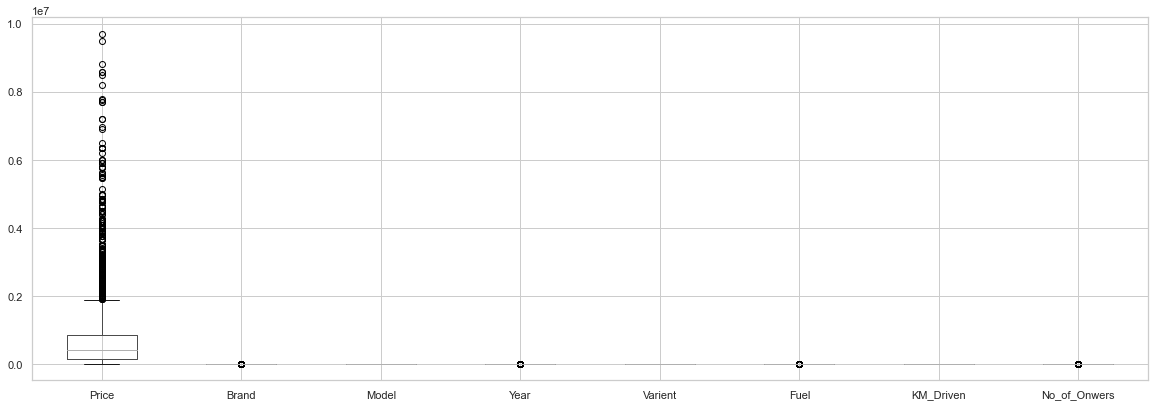

In [76]:
cd.iloc[:,0:8].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

<AxesSubplot:>

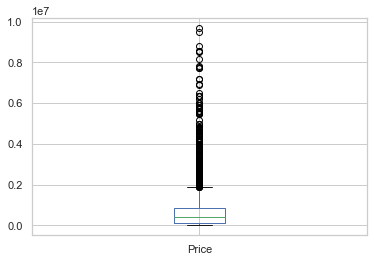

In [77]:
cd['Price'].plot.box()

<AxesSubplot:>

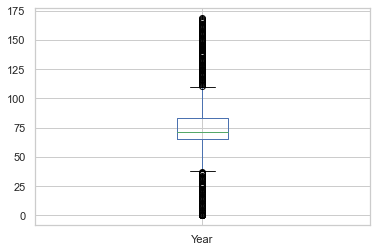

In [78]:
cd['Year'].plot.box()

<AxesSubplot:>

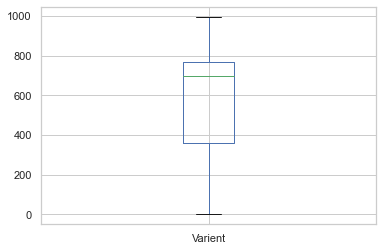

In [79]:
cd['Varient'].plot.box()

<AxesSubplot:>

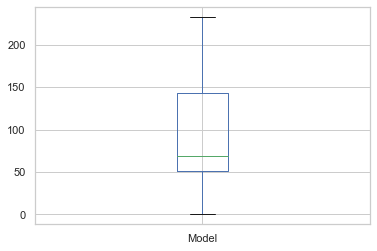

In [80]:
cd['Model'].plot.box()

Price
3.429798767785042


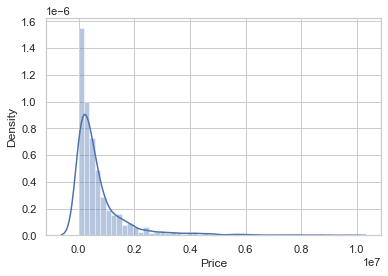

Brand
-1.373211322080196


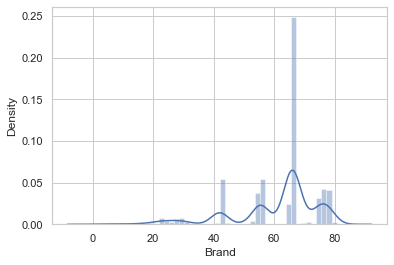

Model
0.5502022961508125


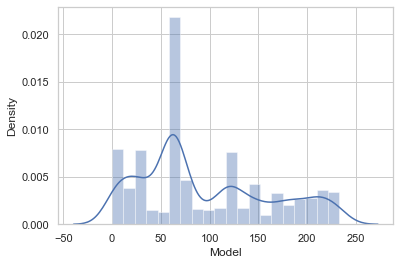

Year
1.4305946373070368


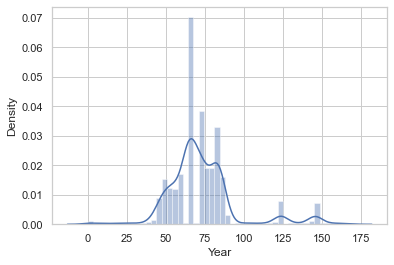

Varient
-0.5715380775848271


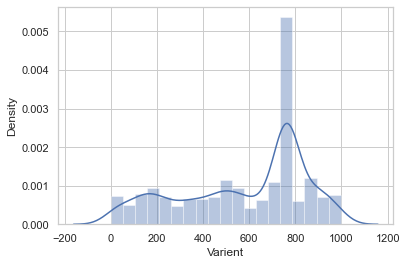

Fuel
-0.0009216931287715679


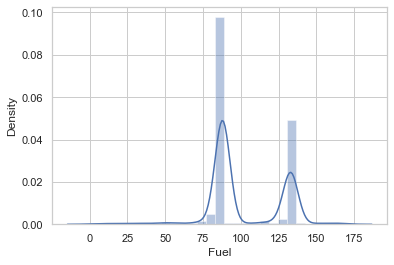

KM_Driven
-0.5810639114176003


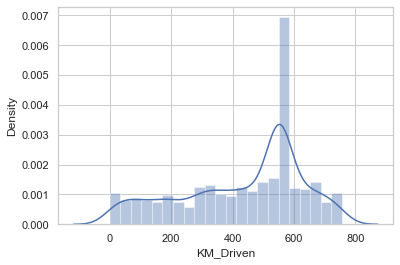

No_of_Onwers
3.5946545199047537


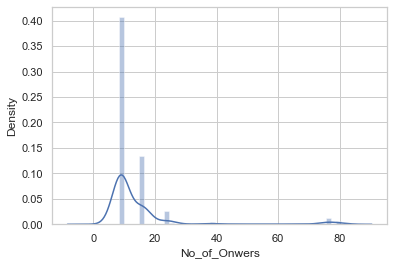

In [81]:
from scipy.stats import skew
for k in cd:
    print(k)
    print(skew(cd[k]))
    
    plt.figure()
    sns.distplot(cd[k])
    plt.show()

In [82]:
cd.skew()

Price           3.431315
Brand          -1.373818
Model           0.550445
Year            1.431227
Varient        -0.571791
Fuel           -0.000922
KM_Driven      -0.581321
No_of_Onwers    3.596243
dtype: float64

In [83]:
cd.head()

,Price,Brand,Model,Year,Varient,Fuel,KM_Driven,No_of_Onwers
0,0,66,61,65,768,88,554,9
1,1090000,55,61,84,973,133,70,9
2,285000,55,62,49,697,88,560,16
3,0,66,61,65,768,88,554,9
4,0,66,61,65,768,88,554,9


In [84]:
x=cd.drop(['Price'],axis=1)
y=cd['Price']

In [85]:
from sklearn.preprocessing import MinMaxScaler
mnt=MinMaxScaler()
x=mnt.fit_transform(x)

In [86]:
x.shape

(3396, 7)

In [87]:
y.shape

(3396,)

In [88]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [89]:
from sklearn.linear_model import LinearRegression
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    ln=LinearRegression()
    ln.fit(x_train,y_train)
    pred=ln.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
    print('Best Accuracy is ',maxAcc,'on Random_state ',maxRS)

Best Accuracy is  0.14419313385130528 on Random_state  1
Best Accuracy is  0.16198304006803244 on Random_state  2
Best Accuracy is  0.16198304006803244 on Random_state  2
Best Accuracy is  0.16198304006803244 on Random_state  2
Best Accuracy is  0.16198304006803244 on Random_state  2
Best Accuracy is  0.16198304006803244 on Random_state  2
Best Accuracy is  0.1876488931404684 on Random_state  7
Best Accuracy is  0.1876488931404684 on Random_state  7
Best Accuracy is  0.1876488931404684 on Random_state  7
Best Accuracy is  0.1876488931404684 on Random_state  7
Best Accuracy is  0.1876488931404684 on Random_state  7
Best Accuracy is  0.1876488931404684 on Random_state  7
Best Accuracy is  0.1876488931404684 on Random_state  7
Best Accuracy is  0.1876488931404684 on Random_state  7
Best Accuracy is  0.1876488931404684 on Random_state  7
Best Accuracy is  0.1876488931404684 on Random_state  7
Best Accuracy is  0.1876488931404684 on Random_state  7
Best Accuracy is  0.1876488931404684 on Ra

Best Accuracy is  0.19349782017288164 on Random_state  143
Best Accuracy is  0.19349782017288164 on Random_state  143
Best Accuracy is  0.19349782017288164 on Random_state  143
Best Accuracy is  0.19349782017288164 on Random_state  143
Best Accuracy is  0.19349782017288164 on Random_state  143
Best Accuracy is  0.19349782017288164 on Random_state  143
Best Accuracy is  0.19349782017288164 on Random_state  143
Best Accuracy is  0.19349782017288164 on Random_state  143
Best Accuracy is  0.19349782017288164 on Random_state  143
Best Accuracy is  0.19349782017288164 on Random_state  143
Best Accuracy is  0.19349782017288164 on Random_state  143
Best Accuracy is  0.19349782017288164 on Random_state  143
Best Accuracy is  0.19349782017288164 on Random_state  143
Best Accuracy is  0.19349782017288164 on Random_state  143
Best Accuracy is  0.19349782017288164 on Random_state  143
Best Accuracy is  0.19349782017288164 on Random_state  143
Best Accuracy is  0.19349782017288164 on Random_state  1

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=143)
ln=LinearRegression()
ln.fit(x_train,y_train)
pred=ln.predict(x_test)
print('predicted price',pred)
print('actual price',y_test)
print('Error :-')
print('mean absolute error :-',mean_absolute_error(y_test,pred))
print('mean squared error :-',mean_squared_error(y_test,pred))
print('root mean squared error :-',np.sqrt(mean_squared_error(y_test,pred)))
from sklearn.metrics import r2_score
print('r2_score value :-',r2_score(y_test,pred))

predicted price [835643.63753487 479318.82631786 931418.20949608 ... 479318.82631786
 479318.82631786 737851.45607165]
actual price 970      510000
746           0
3091    1450000
750           0
1954     339000
         ...   
1098     450000
260           0
1612          0
809           0
557      480000
Name: Price, Length: 1121, dtype: int32
Error :-
mean absolute error :- 575574.26611449
mean squared error :- 881928787794.4585
root mean squared error :- 939110.6366102231
r2_score value :- 0.1799965029022177


In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [92]:
from sklearn.linear_model import ElasticNet
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(1,20))}
en=ElasticNet()
gsp=GridSearchCV(en,parameters)
gsp.fit(x_train,y_train)
print(gsp.best_params_)

{'alpha': 0.001, 'random_state': 1}


In [93]:
en=ElasticNet(alpha=0.001,random_state=1)
en.fit(x_train,y_train)
preden=en.predict(x_test)
r2=r2_score(y_test,preden)

cv_score=cross_val_score(en,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean
print(r2)
print(cv_mean)

0.17934245551271522
-0.7077395548219491


In [94]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
r2=r2_score(y_test,predad)

cv_score=cross_val_score(ad,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean
print(r2)
print(cv_mean)

0.21705634831174836
-2.9489662355905337


In [95]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
r2=r2_score(y_test,preddtr)

cv_score=cross_val_score(dtr,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean
print(r2)
print(cv_mean)

0.6955728990346354
0.2702289786153291


In [96]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2=r2_score(y_test,predrf)

cv_score=cross_val_score(rf,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean
print(r2)
print(cv_mean)

0.8298950164338419
0.47548271546973153


In [97]:
cv_score=cross_val_score(ln,x,y,cv=5)
cv_mean=cv_score.mean()
print(cv_mean)

-0.7226256884012019


In [107]:
from sklearn.ensemble import RandomForestRegressor
rfp2=RandomForestRegressor()

In [108]:
rfp2.fit(x_train,y_train)
predrfp2=rf.predict(x_test)
r2=r2_score(y_test,predrfp2)
print(r2)

0.8298950164338419


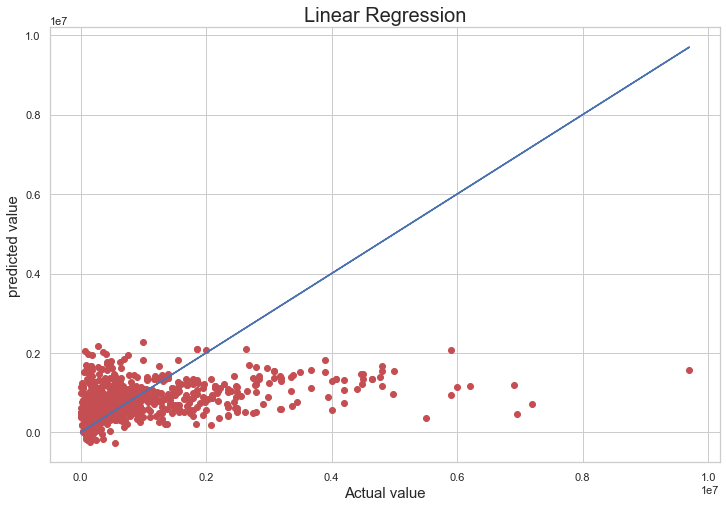

In [109]:
plt.figure(figsize=(12,8))
plt.scatter(x=y_test,y=pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual value',fontsize=15)
plt.ylabel('predicted value',fontsize=15)
plt.title("Linear Regression",fontsize=20)
plt.show()

In [110]:
import joblib
joblib.dump(rfp2,'carprojectrobomodel.pkl')

['carprojectrobomodel.pkl']